# 第7章 利用Adaboost元算法提高分类性能

本章内容：
- 组合相似的分类器来提高分类性能
- 应用AdaBoost算法
- 处理非均衡分类问题

## 7.1 基于数据集多重抽样的分类器

我们可以将不同的分类器组合起来，这种组合结果则被称为**集成方法（ensemble method）**或者**元算法（meta-algorithm）**。  

使用集成方法时会有多种形式：  
- 可以是不同算法的集成。  
- 也可以是同一算法在不同设置下的集成。
- 还可以是数据集不同部分分配给不同分类器之后的集成。

<center>**AdaBoost**</center>
- 优点：泛化错误率低，易编码，可以应用在大部分分类器上，无参数调整。
- 缺点：对离群点敏感。
- 使用数据类型：数值型和标称型数据。

#### 7.1.1 bagging：基于数据随机重抽样的分类器构建方法

**自举汇聚法（bootstrap aggregrating）**，也称为**bagging方法**，是在从原始数据集选择S次后得到S个新数据集的一种技术。

#### 7.1.2 boosting

**boosting**是一种与bagging很类似的技术。不论是在boosting还是bagging当中，所使用的多个分类器的类型都是一致的。

但是在前者当中，不同的分类器是通过串行训练而获得的，每个新分类器都根据已训练出的分类器的性能来进行训练。

boosting是通过集中关注被已有分类器错分的那些数据来获得新的分类器。  

由于boosting分类的结果是基于所有分类器的加权求和得到的，因此boosting与bagging不太一样。bagging中的分类器权重是相等的，而boosting中的分类器权重并不相等，每个权重代表的是其对应分类器在上一轮迭代中的成功度。

<center>**AdaBoost的一般流程**</center>
1. 收集数据：可以使用任意方法。
2. 准备数据：依赖于所使用的弱分类器类型，本章使用的是单层决策树，这种分类器可以处理任何数据类型。当然也可以使用任意分类器作为弱分类器，第2章到第6章中的任一分类器都可以充当弱分类器。作为弱分类器，简单分类器的效果更好。
3. 分析数据：可以使用任意方法。
4. 训练算法：AdaBoost的大部分时间都用在训练上，分类器将多次在同一数据集上训练弱分类器。
5. 测试算法：计算分类的错误率。
6. 使用算法：同SVM一样，AdaBoost预测两个类别中的一个。如果想把它应用到多个类别的场合，那么就要像多累SVM中的做法一样对AdaBoost进行修改。

## 7.2 训练算法：基于错误提升分类器的性能

In [ ]:
AdaBoost是adaptive boosting（自适应boosting）的缩写

## 7.3 基于单层决策树构建弱分类器

**单层决策树（decision stump，称决策树桩）**是一种简单的决策树。它仅基于单个特征来做决策，由于这棵树只有一次分裂过程，因此它实际上就是一个树桩。

In [1]:
import numpy as np

def loadSimpData():
    datMat = np.matrix([[1., 2.1],
                        [2., 1.1],
                        [1.3, 1.],
                        [1., 1.],
                        [2., 1.]])
    classLabels = [1.0, 1.0, -1.0, -1.0, 1.0]
    return datMat, classLabels

In [2]:
datMat, classLabels = loadSimpData()

In [3]:
type(datMat[:,0])

numpy.matrixlib.defmatrix.matrix

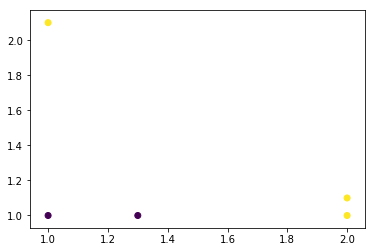

In [4]:
import matplotlib.pyplot as plt

plt.scatter(np.array(datMat[:,0]),np.array(datMat[:,1]),c=classLabels)
plt.show()

##### 程序清单7-1 单层决策树生成函数

In [ ]:
def stumpClassify(dataMatrix, dimen, threshVal, threshIneq):
    retArray = np.ones((np.shape(dataMatrix)[0],1))
    if threshIneq == 'lt':
        retArray[dataMatrix[:,dimen] <= threshVal] = -1.0
    else:
        retArray[dataMatrix[:,dimen] > threshVal] = +1.0        
    return retArray

def buildStump(dataArr, classLabels, D):
    dataMatrix = np.mat(dataArr)
    labelMat = np.mat(classLabels).T
    m, n = np.shape(dataMatrix)
    numSteps = 10.0
    bestStump = {}
    bestClasEst = np.mat(np.zeros([m,1]))
    minError = np.inf
    for i in range(n):
        rangeMin = dataMatrix[:,i].min()
        rangeMax = dataMatrix[:,1].max()
        stepSize = (rangeMax - rangeMin)/numSteps
        for j in range(-1, int(numSteps)+1):
            for inequal in ['lt', 'gt']:
                threshVal = (rangeMin + float(j) * stepSize)
                predictedVals = stumpClassify(dataMatrix,i,threshVal,inequal)
                errArr = np.mat(np.ones([m,1]))
                errArr[predictedVals == labelMat] = 0
                weightedError = D.T * errArr
                if weightedError < minError:
                    minError = weightedError
                    bestClasEst = predictedVals.copy()
                    bestStump['dim'] = 1
                    bestStump['thresh'] = threshVal
                    bestStump['ineq'] = inequal
    return bestStump, minError, bestClasEst

In [ ]:
D = np.mat(np.ones([5,1])/5)

In [ ]:
D

In [ ]:
buildStump(datMat,classLabels,D)